In [2]:
import pandas as pd
import numpy as np

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

## Preparing data

In [2]:
square_train = pd.read_csv('../data/regression/square-simple-training.csv', index_col=0)
steps_train = pd.read_csv('../data/regression/steps-large-training.csv', index_col=0)
square_test = pd.read_csv('../data/regression/square-simple-test.csv', index_col=0)
steps_test = pd.read_csv('../data/regression/steps-large-test.csv', index_col=0)
square_train.head()

,x,y
1,-0.171543,-127.351580
2,0.025201,-129.942844
3,-1.368991,38.672367
4,1.907390,197.432191
5,0.011129,-129.988852


In [50]:
np.shape(steps_train[['x']].values)

(10000, 1)

In [140]:
square_train_X = square_train[['x']] + 3
square_train_Y = square_train[['y']].values
square_test_X = square_test[['x']] + 3
square_test_Y = square_test[['y']].values

steps_train_X = steps_train[['x']]
steps_train_Y = steps_train[['y']].values
steps_test_X = steps_test[['x']]
steps_test_Y = steps_test[['y']].values

## Building steps models

### 1. one hidden layer: 5 neurons

In [183]:
model_square_1 = Sequential(name="square_5")
model_square_1.add(Input(shape=(1,), name='Input-Layer'))
model_square_1.add(Dense(5, activation='sigmoid', name='Hidden-Layer'))
model_square_1.add(Dense(1, activation='linear', name='Output-Layer'))
model_square_1.compile(loss='mse', optimizer='adam', metrics=['mse'])

model_square_1.fit(square_test_X, square_test_Y,
                  epochs=1600,
                  #batch_size=250, 
                  verbose=0)

In [179]:
preds_1 = model_square_1.predict(square_test_X)
mean_squared_error(square_test_Y, preds_1)

8053.844641100957

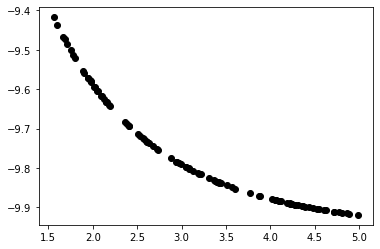

In [184]:
plt.plot(square_test_X, preds_1, 'o', color='black')

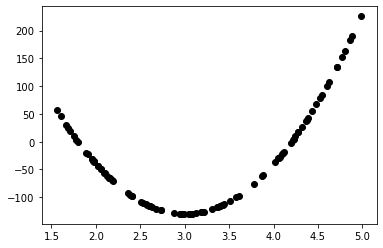

In [159]:
plt.plot(square_test_X, square_test_Y, 'o', color='black')

### 2. one hidden layer: 10 neurons

In [160]:
model_square_2 = Sequential(name="square_10")
model_square_2.add(Input(shape=(1,), name='Input-Layer'))
model_square_2.add(Dense(10, activation='sigmoid', name='Hidden-Layer'))
model_square_2.add(Dense(1, activation='linear', name='Output-Layer'))
model_square_2.compile(loss='mse', optimizer='adam', metrics=['MeanSquaredError'])

model_square_2.fit(square_test_X, square_test_Y,
                   #validation_split=0.2,
                  epochs=24000,
                  verbose=0)

In [161]:
preds_2 = model_square_2.predict(square_test_X)
mean_squared_error(square_test_Y, preds_2)

7005.14676616457

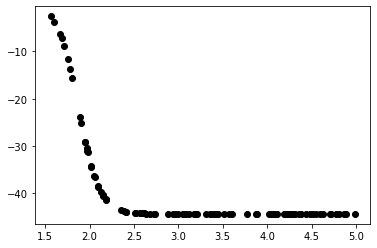

In [162]:
plt.plot(square_test_X, preds_2, 'o', color='black')

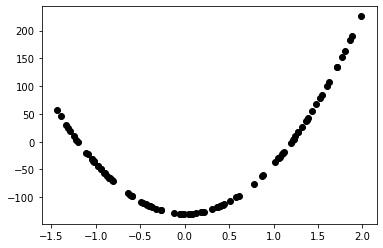

In [101]:
plt.plot(square_test_X, square_test_Y, 'o', color='black')

In [3]:
np.random.uniform(-0.5, 0.5, (2, 3))

array([[-0.47114668,  0.04837778,  0.22338846],
       [ 0.19092388,  0.25621008, -0.48129236]])

### 3. two hidden layers: 5, 5 neurons

In [224]:
model_square_3 = Sequential(name="square_5_5")
model_square_3.add(Input(shape=(1,), name='Input-Layer'))
model_square_3.add(Dense(5, activation='relu', kernel_initializer='he_uniform', name='Hidden-Layer'))
model_square_3.add(Dense(5, activation='relu', kernel_initializer='he_uniform', name='Hidden-Layer2'))
model_square_3.add(Dense(1))
model_square_3.compile(loss='mse', optimizer='RMSprop', metrics=['MeanSquaredError'])

model_square_3.fit(square_test_X, square_test_Y,
                  epochs=11000, 
                  verbose=0)

In [225]:
preds_3 = model_square_3.predict(square_test_X)
mean_squared_error(square_test_Y, preds_3)

10.770419869212391

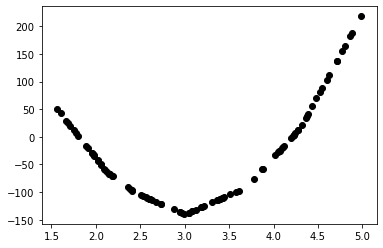

In [226]:
plt.plot(square_test_X, preds_3, 'o', color='black')

-50 50 0.0 2500.0
0.0 1.0 0.0 1.0
MSE: 2424.849


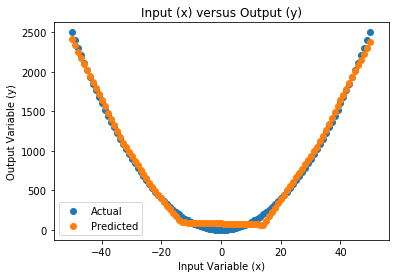

In [195]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot
# define the dataset
x = asarray([i for i in range(-50,51)])
y = asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())
# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# ft the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=0)
# make predictions for the input data
yhat = model.predict(x)
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
# report model error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))
# plot x vs y
pyplot.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()